# welter
## Issue 35: Figure of postage stamps of spectral features
### Part I: Try it out

In [1]:
import os
import json
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

#### Need to re-run these before making each plot.

In [3]:
ws = np.load("../sf/m078/output/mix_emcee/run01/emcee_chain.npy")

burned = ws[:, -200:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)

ff = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])

inds_sorted = np.argsort(ff)
ff_sorted = ff[inds_sorted]
fc_sorted = fc[inds_sorted]

#### Double check correlation plots as a sanity check for trends in $T_{\mathrm{eff}}$ and $f_\Omega$

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


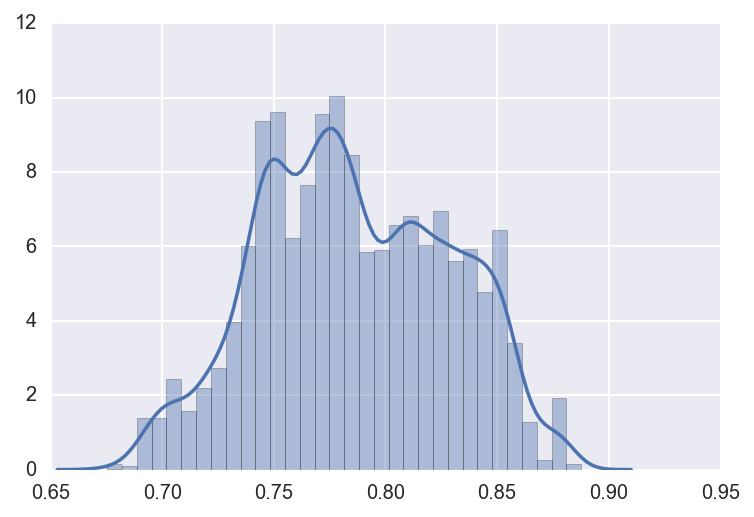

In [4]:
sns.distplot(ff)

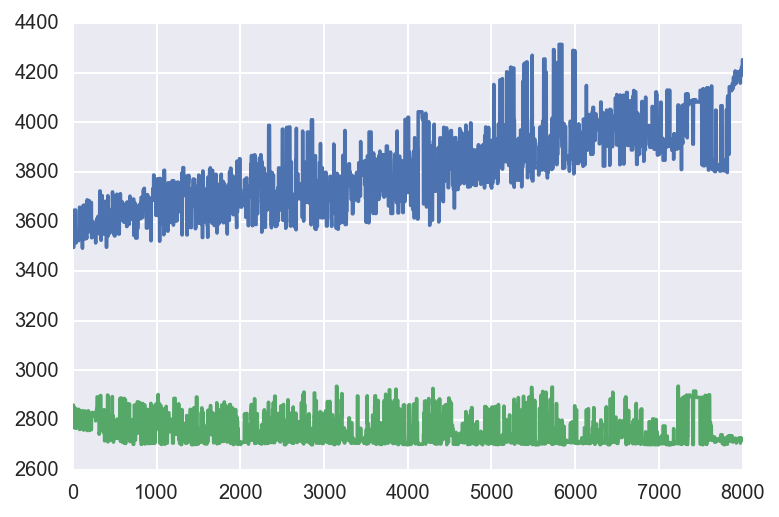

In [5]:
plt.plot(fc_sorted[:,0])
plt.plot(fc_sorted[:,6])

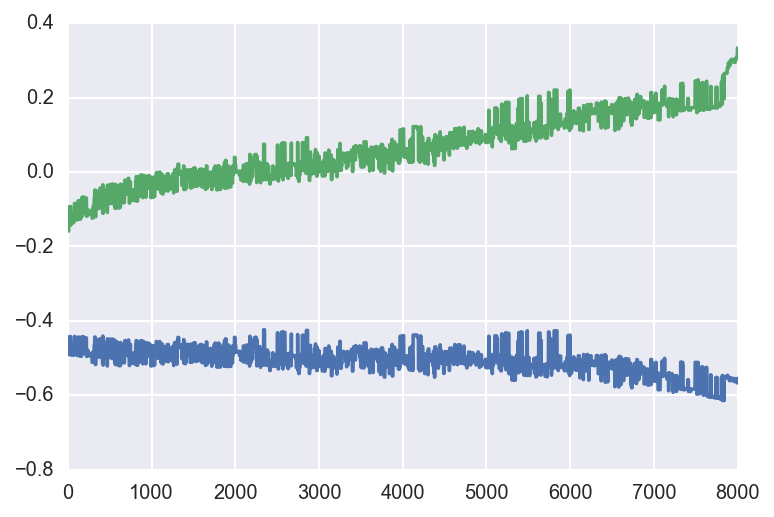

In [6]:
plt.plot(fc_sorted[:,5])
plt.plot(fc_sorted[:,7])

In [7]:
#ax = sns.kdeplot(ff_sorted, fc_sorted[:,0], shade=True)
#ax.plot(ff_sorted[400], fc_sorted[400,0], 'b*', ms=13)
#ax.plot(ff_sorted[4000], fc_sorted[4000,0], 'k*', ms=13)
#ax.plot(ff_sorted[7600], fc_sorted[7600,0], 'r*', ms=13)

### Generate the data using the new `plot_specific_mix_model.py`

This custom Starfish python script generates model spectra at 5, 50, and 95 percentiles of fill factor, and then saves them to a csv file named `models_ff-05_50_95.csv`.

In [8]:
import pandas as pd

In [9]:
models = pd.read_csv('/Users/gully/GitHub/welter/sf/m078/output/mix_emcee/run01/models_ff-05_50_95.csv')

In [10]:
#models.head()

### This is a complex Matplotlib layout

In [11]:
lw =1.0

In [12]:
from matplotlib import gridspec
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter

In [13]:
sns.set_context('paper')
sns.set_style('ticks')
sns.set_color_codes()

### New version has no right panel

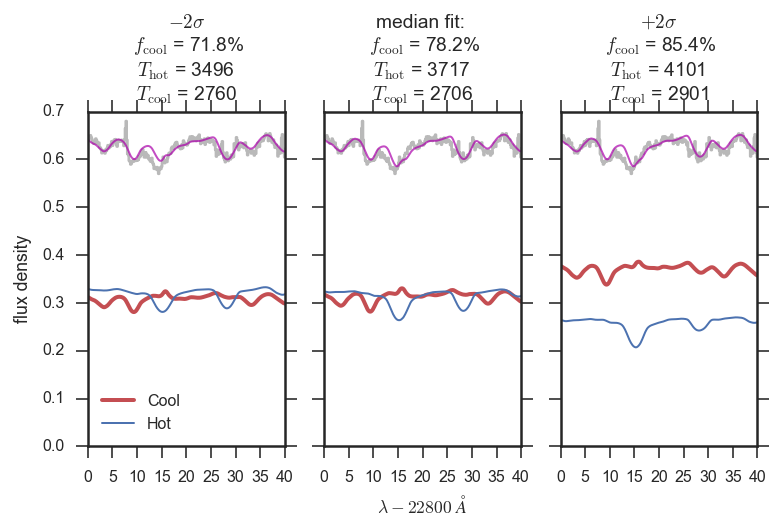

In [14]:
fig = plt.figure(figsize=(6.0, 3.0))

#fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

lc = 22800
wlb = 22800
wlr = 22840



gs = gridspec.GridSpec(1, 3)

ax1 = fig.add_subplot(gs[0,0])
ax1.step(models.wl-lc, models.data.values, '-k', alpha=0.3)
ax1.plot(models.wl-lc, models.model_comp05.values, color='#AA00AA', linewidth=lw, alpha=0.7)
ax1.plot(models.wl-lc, models.model_cool05, color='r', linewidth=lw*2, label='Cool')
ax1.plot(models.wl-lc, models.model_hot05, color='b', linewidth=lw, label='Hot')
ax1.set_title('$-2\sigma$ \n $f_\mathrm{cool}$'+' = {:0.1%} \n'.format(ff_sorted[400])+
              '$T_\mathrm{hot}$ = '+'{} \n'.format(np.int(fc_sorted[400,0]))+
              '$T_\mathrm{cool}$ = '+'{}'.format(np.int(fc_sorted[400,6])))

ax1.set_ylabel('flux density')
ax1.set_xlim(wlb-lc,wlr-lc)
ax1.set_ylim(0, 0.7)
plt.legend(loc='lower left')

ax2 = fig.add_subplot(gs[0,1])
ax2.step(models.wl-lc, models.data, '-k', alpha=0.3)
ax2.plot(models.wl-lc, models.model_comp50, color='#AA00AA', linewidth=lw, alpha=0.7)
ax2.plot(models.wl-lc, models.model_cool50, color='r', linewidth=lw*2)
ax2.plot(models.wl-lc, models.model_hot50, color='b', linewidth=lw)
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.set_title('median fit: \n $f_\mathrm{cool}$'+' = {:0.1%} \n'.format(ff_sorted[4000])+
              '$T_\mathrm{hot}$ = '+'{} \n'.format(np.int(fc_sorted[4000,0]))+
              '$T_\mathrm{cool}$ = '+'{}'.format(np.int(fc_sorted[4000,6])))


ax2.set_xlim(wlb-lc,wlr-lc)
ax2.set_xlabel('$\lambda - {} \;\AA$ '.format(lc))
ax2.set_ylim(0, 0.7)

ax3 = fig.add_subplot(gs[0,2])
ax3.step(models.wl-lc, models.data, '-k', alpha=0.3)
ax3.plot(models.wl-lc, models.model_comp95, color='#AA00AA', linewidth=lw, alpha=0.7)
ax3.plot(models.wl-lc, models.model_cool95, color='r', linewidth=lw*2)
ax3.plot(models.wl-lc, models.model_hot95, color='b', linewidth=lw)
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax3.set_title('$+2\sigma$ \n $f_\mathrm{cool}$'+' = {:0.1%} \n'.format(ff_sorted[7600])+
              '$T_\mathrm{hot}$ = '+'{} \n'.format(np.int(fc_sorted[7600,0]))+
              '$T_\mathrm{cool}$ = '+'{}'.format(np.int(fc_sorted[7600,6])))
ax3.set_ylim(0, 0.7)
ax3.set_xlim(wlb-lc,wlr-lc)

plt.savefig('../document/figures/spectral_postage_stamp_03.pdf', bbox_inches='tight')

### Old version

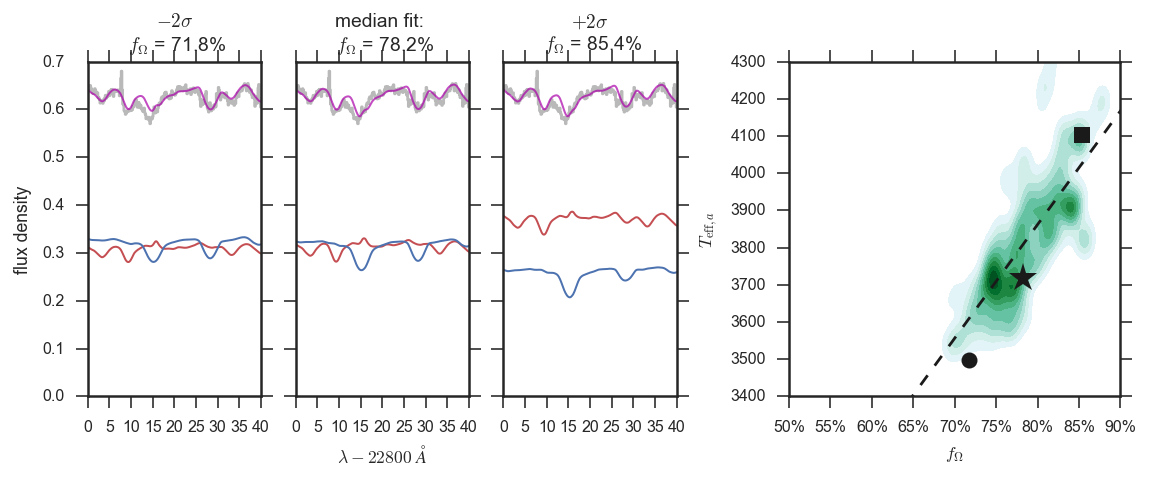

In [14]:
fig = plt.figure(figsize=(9.0, 3.0))

#fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

lc = 22800
wlb = 22800
wlr = 22840

gs = gridspec.GridSpec(1, 5)

ax1 = fig.add_subplot(gs[0,0])
ax1.step(models.wl-lc, models.data, '-k', alpha=0.3)
ax1.plot(models.wl-lc, models.model_comp05, color='#AA00AA', linewidth=lw, alpha=0.7)
ax1.plot(models.wl-lc, models.model_cool05, color='r', linewidth=lw)
ax1.plot(models.wl-lc, models.model_hot05, color='b', linewidth=lw)
ax1.set_title('$-2\sigma$ \n $f_\Omega$ = {:0.1%}'.format(ff_sorted[400]))
ax1.set_ylabel('flux density')
ax1.set_xlim(wlb-lc,wlr-lc)
ax1.set_ylim(0, 0.7)

ax2 = fig.add_subplot(gs[0,1])
ax2.step(models.wl-lc, models.data, '-k', alpha=0.3)
ax2.plot(models.wl-lc, models.model_comp50, color='#AA00AA', linewidth=lw, alpha=0.7)
ax2.plot(models.wl-lc, models.model_cool50, color='r', linewidth=lw)
ax2.plot(models.wl-lc, models.model_hot50, color='b', linewidth=lw)
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.set_title('median fit: \n $f_\Omega$ = {:0.1%}'.format(ff_sorted[4000]))
ax2.set_xlim(wlb-lc,wlr-lc)
ax2.set_xlabel('$\lambda - {} \;\AA$ '.format(lc))
ax2.set_ylim(0, 0.7)

ax3 = fig.add_subplot(gs[0,2])
ax3.step(models.wl-lc, models.data, '-k', alpha=0.3)
ax3.plot(models.wl-lc, models.model_comp95, color='#AA00AA', linewidth=lw, alpha=0.7)
ax3.plot(models.wl-lc, models.model_cool95, color='r', linewidth=lw)
ax3.plot(models.wl-lc, models.model_hot95, color='b', linewidth=lw)
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax3.set_title('$+2\sigma$ \n $f_\Omega$ = {:0.1%}'.format(ff_sorted[7600]))
ax3.set_ylim(0, 0.7)
ax3.set_xlim(wlb-lc,wlr-lc)

# Fit a line to the data
z = np.polyfit(ff_sorted, fc_sorted[:,0], 1)
p = np.poly1d(z)
xx = np.linspace(0, 1.0, 100)


ax4 = fig.add_subplot(gs[0,3:])
sns.kdeplot(ff_sorted, fc_sorted[:,0], shade=True, shade_lowest=False, ax=ax4)
ax4.plot(ff_sorted[400], fc_sorted[400,0], 'ko', ms=8)
ax4.plot(ff_sorted[4000], fc_sorted[4000,0], 'k*', ms=15)
ax4.plot(ff_sorted[7600], fc_sorted[7600,0], 'ks', ms=8)

ax4.plot(xx, p(xx), 'k--')

ax4.set_xlim(0.5, 0.9)
ax4.set_ylim(3400, 4300)

## Not available until matplotlib 2.1!
#import matplotlib.ticker as mtick
#ax.xaxis.set_major_formatter(mtick.PercentFormatter())

ax4.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

ax4.set_ylabel('$T_{\mathrm{eff}, a}$')
ax4.set_xlabel('$f_{\Omega}$')
pos1 = ax4.get_position() # get the original position 
pos2 = [pos1.x0 + 0.06, pos1.y0, pos1.width *0.87, pos1.height] 
ax4.set_position(pos2) # set a new position
#fig.tight_layout(w_pad=0.01)
#plt.savefig('../results/fig/spectral_postage_stamp_03.pdf', bbox_inches='tight')

## The end